# WEEK 3

## limits of diversification

Diversification yields the most efficient risk premium portfolio in terms of the highest reward per unit of risk. Under the scope of the CAPM model, it reduces idiosyncratic risk to zero, but the portfolio can still be affected by systematic risk. Thus, under average market conditions, diversification is effective, but during bear market periods when the overall market is on a downturn, even a well-diversified portfolio can lose value. So, what should you do when facing systematic risk? In such cases, turning to hedging can provide protection against a potential downside in price, albeit at the cost of giving up potential gains.

As an asset manager, you are faced with the dilemma: How much should I risk? How much should I allocate to seeking assets? How much should I invest in liability-hedging assets? Allocating too much to risky assets could lead to bankruptcy in a bear market, but if you allocate too much to liability-hedging assets, you might miss out on potential upsides in risky assets. The solution lies in dynamic hedging, which functions as a risk-taking measure in terms of margin for error, allowing for optimal allocation in risky assets and safe hedging against liabilities based on the level of risk.





## Lab session-Limits of diversification

### What happens in terms of correlation among stocks in the market when markets fall?

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import risk as r

C:\Users\pipeq\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


The S&P 500 is a market index that represents the 500 largest public companies in the U.S., weighted by market capitalization and adjusted for float. In this lab, we have three monthly time series datasets: industry returns, number of firms, and firm size. Similar to the S&P 500, we aim to build a market index where all individual industries in the portfolio are proportionate with the market cap. However, unlike the S&P 500, our index will not incorporate any float adjustments, setting it apart as a weighted index based solely on market capitalization. Once we construct the market index, we will examine the effects on correlation during periods when the stock index is rising or falling.

In [3]:
# There'r pre build code in the module to make data transformation of the data
#Industry monthly returns data
ind_returns=r.data_ind() 
#Month number of firms across industry
ind_nfirms=r.data_ind_nfirms()
#Average firm size, it is similar to market cap
ind_size=r.data_ind_size()

In [4]:
#Evaluate the shape of all data set 
ind_returns.shape

(1110, 30)

In [5]:
ind_nfirms.shape

(1110, 30)

In [6]:
ind_size.shape

(1110, 30)

it is important to verify that the shape of all data sets is the same. This because we'r gonna do a hadamard product to calculate the industries market cap

In [7]:
#Calculation of industries market cap is the multiplication between number of firms and average size
ind_mktcap=ind_nfirms*ind_size
ind_mktcap.shape # The resulting matrix if of the same size

(1110, 30)

In [8]:
ind_mktcap.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,1547.14,21.36,955.52,184.87,24.04,178.16,220.32,178.64,979.03,80.34,...,1751.80,40.80,396.90,212.10,4951.34,2.38,1539.45,64.92,225.96,97.00
1926-08,1552.30,20.25,967.52,190.19,26.66,177.04,237.96,180.60,1056.21,80.60,...,1766.35,44.25,404.18,227.16,5031.26,1.80,1536.81,66.00,226.56,102.04
1926-09,1591.00,25.74,1024.48,191.10,29.34,169.44,231.48,187.11,1114.01,87.23,...,1804.80,45.15,417.27,220.92,5255.48,1.90,1521.63,65.64,236.04,108.84
1926-10,1597.02,26.76,1030.72,201.32,28.84,169.84,228.36,188.09,1163.99,88.66,...,1820.80,45.90,416.64,208.62,5241.42,1.76,1522.95,64.80,232.32,104.64
1926-11,1542.84,25.86,1041.28,191.66,31.58,161.12,228.36,185.78,1106.02,88.92,...,1818.70,44.67,411.18,196.80,5087.50,1.48,1485.99,61.98,220.20,95.76


#total marketcap
Now we calculate the total market cap, summing the industries market cap

In [9]:
total_mktcap=ind_mktcap.sum(axis="columns") # i want to sum it across columns, because i'm summing across industries

In [12]:
#Now we calculate the weigh 
ind_capweight=ind_mktcap.divide(total_mktcap, axis="rows")
# we want to divide it over row

In [13]:
ind_capweight.sum(axis="columns")

1926-07    1.0
1926-08    1.0
1926-09    1.0
1926-10    1.0
1926-11    1.0
          ... 
2018-08    1.0
2018-09    1.0
2018-10    1.0
2018-11    1.0
2018-12    1.0
Freq: M, Length: 1110, dtype: float64

In [15]:
#compare finance vs steel
ax=pd.DataFrame({"Finance":ind_capweight["Fin"],"Steel":ind_capweight["Steel"]})

<AxesSubplot:>

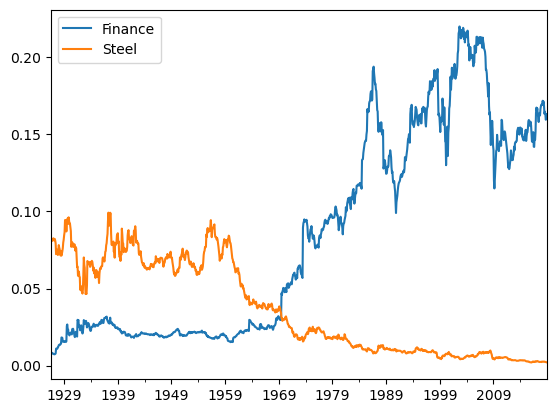

In [35]:
ax.plot.line()

The steels industry has a negative trend while the finance industry has a positive trend, for instance nowadays the finance industry generates more value than the steel industry, this situation was completely differrent in 1929 where the steel industry has a greater representation.

In [16]:
#build an index
total_market_return=(ind_capweight*ind_returns).sum(axis="columns")

<AxesSubplot:>

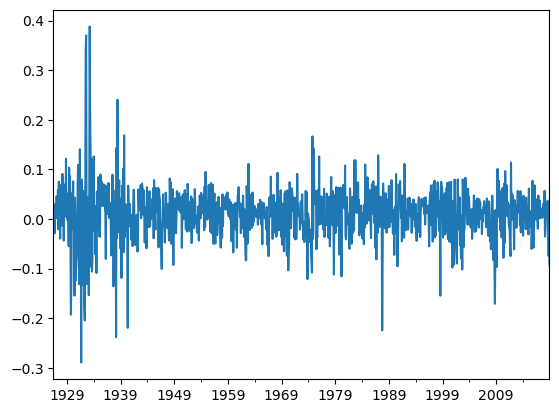

In [17]:
total_market_return.plot()

In [ ]:
# convert returns into a market index

In [18]:
# total market index is a wealth index  derived from returns
total_market_index=r.drawdown(total_market_return)["Wealth"]

Look at returns during 3 year period ( 36 months).rolling is a pandas method, it creates another time series where each element is computed out of a widows of 36 month, what i'm going to do in this 36 month perood is calculate the mean. It  only works with time series data.

<AxesSubplot:>

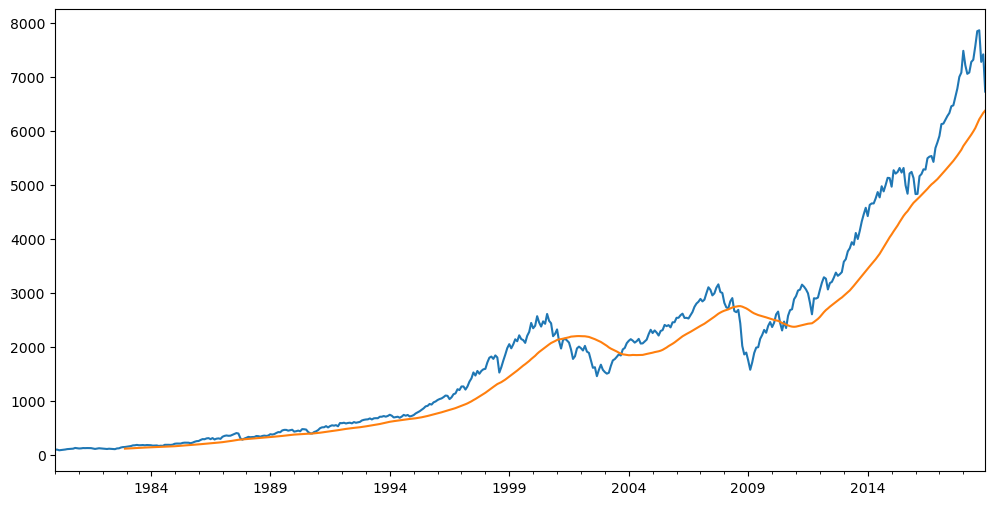

In [20]:
# when i put both plots in the same cell, matplotline is smarth enough to plot both in same graph.
total_market_index["1980":].plot(figsize=(12,6))
total_market_index["1980":].rolling(window=36).mean().plot(figsize=(12,6))



Now we can look at the returns of that index not the index itself. The moving average, it is a fancy way of plotiing the average, it takes 36 month to calculate the first data point.We don't want to just to compute the mean, we want to compound those returns over time. aggregate each of those 36 month windows, how do we wanna aggregate them, we aggregate compuding it 


<AxesSubplot:>

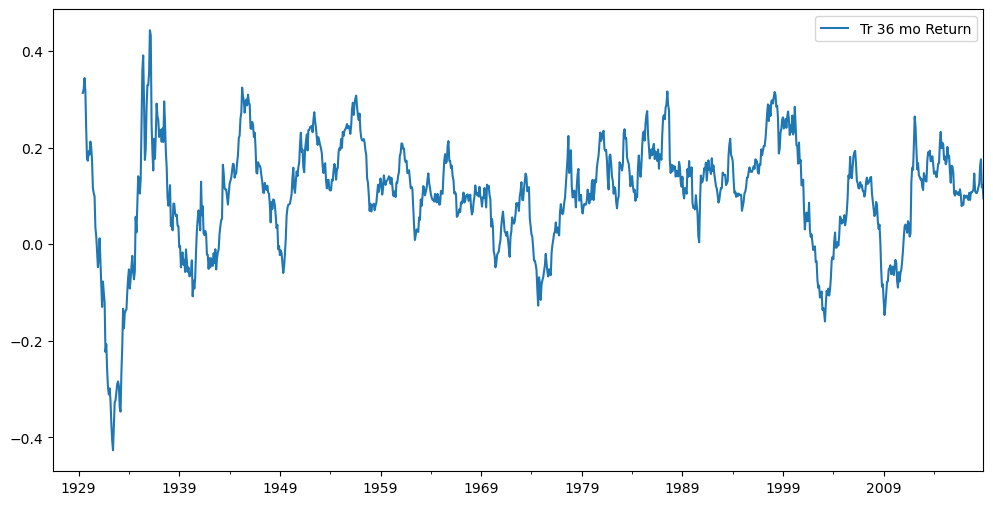

In [21]:
#total market index trailing 36 month
# aggregate apply a funtion to each column of the data frame
# for each postion in the DataFrame a 36 month widow is considered, and the function is applied to just those rows. As the windows rows down of the dataframe, the function is reapplied each time, yieldiing a new value for each position.
tmi_tr36rets=total_market_return.rolling(window=36).aggregate(r.annualized_return,periods_per_year=12)
tmi_tr36rets.plot(figsize=(12,6),label="Tr 36 mo Return",legend=True)

In [24]:
tmi_tr36rets.tail()

2018-08    0.162543
2018-09    0.175679
2018-10    0.117769
2018-11    0.122645
2018-12    0.094723
Freq: M, dtype: float64

In Time when the market is crashing, is there some relationship between this and correlation? because if correlation are gonna be able to bail us out, we want to make sure that there's still correlation potencial in the down markets. We need to know if stock are correlated or decorrelated.

## correlation and returns over time, concep of multiindex

In [26]:
ts_corr=ind_returns.rolling(window=36).corr()
ts_corr.tail()

Food      Beer     Smoke     Games     Books     Hshld  \
2018-12 Whlsl  0.474948  0.356983  0.122672  0.510425  0.803362  0.419280   
        Rtail  0.517856  0.406107  0.030283  0.676464  0.636320  0.358336   
        Meals  0.370187  0.385483  0.122007  0.301516  0.520649  0.308216   
        Fin    0.298823  0.192706  0.027593  0.480276  0.694812  0.162690   
        Other  0.436952  0.376565  0.224010  0.331829  0.558072  0.390610   

                  Clths      Hlth     Chems     Txtls  ...     Telcm  \
2018-12 Whlsl  0.570071  0.739764  0.785796  0.634197  ...  0.648092   
        Rtail  0.676598  0.714933  0.626034  0.634202  ...  0.562238   
        Meals  0.302176  0.416193  0.520023  0.491726  ...  0.406184   
        Fin    0.425899  0.658468  0.760151  0.577090  ...  0.420863   
        Other  0.467099  0.645035  0.712511  0.520953  ...  0.607868   

                  Servs     BusEq     Paper     Trans     Whlsl     Rtail  \
2018-12 Whlsl  0.567395  0.543362  0.764252  0.829185  1.000000  0.744842   
        Rtail  0.762616  0.628246  0.656510  0.630615  0.744842  1.000000   
        Meals  0.444629  0.399438  0.627113  0.663358  0.643879  0.616947   
        Fin    0.585418  0.517947  0.670936  0.760730  0.746480  0.611883   
        Other  0.460322  0.434487  0.773798  0.756961  0.767652  0.619918   

                  Meals       Fin     Other  
2018-12 Whlsl  0.643879  0.746480  0.767652  
        Rtail  0.616947  0.611883  0.619918  
        Meals  1.000000  0.502563  0.605226  
        Fin    0.502563  1.000000  0.734837  
        Other  0.605226  0.734837  1.000000  

[5 rows x 30 columns]

Correlation is itself  a squared matrix, it is a time series of matrices not a time series of numbers; fist index date, second index industries rows industries columns. It is a multiindex
**what do we want?**
We want to look at the average correlation, the average of the whole matrix in 2018-12, we do it with the feature in pandas **group by** that is similar to rolling. In a multi level you need to say what level you want to group by


In [28]:
ts_corr.index.names

FrozenList(['date', 'industry'])

In [31]:
# index has no indexes names, let's give it a name
ts_corr.index.names=["date","industry"] #we aggregate a label
ts_corr.head()

Food  Beer  Smoke  Games  Books  Hshld  Clths  Hlth  Chems  \
date    industry                                                               
1926-07 Food       NaN   NaN    NaN    NaN    NaN    NaN    NaN   NaN    NaN   
        Beer       NaN   NaN    NaN    NaN    NaN    NaN    NaN   NaN    NaN   
        Smoke      NaN   NaN    NaN    NaN    NaN    NaN    NaN   NaN    NaN   
        Games      NaN   NaN    NaN    NaN    NaN    NaN    NaN   NaN    NaN   
        Books      NaN   NaN    NaN    NaN    NaN    NaN    NaN   NaN    NaN   

                  Txtls  ...  Telcm  Servs  BusEq  Paper  Trans  Whlsl  Rtail  \
date    industry         ...                                                    
1926-07 Food        NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
        Beer        NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
        Smoke       NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
        Games       NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
        Books       NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

                  Meals  Fin  Other  
date    industry                     
1926-07 Food        NaN  NaN    NaN  
        Beer        NaN  NaN    NaN  
        Smoke       NaN  NaN    NaN  
        Games       NaN  NaN    NaN  
        Books       NaN  NaN    NaN  

[5 rows x 30 columns]

In [38]:
#industries average correlation trailing 36 month
ind_tr36corr=ts_corr.groupby(level="date").apply(lambda cormat: cormat.values.mean())
#apply allows apply a function in this case is applied to each group
#remenber values returns the values of the dataframe as a numpy array, stripping away the index and columns.

<AxesSubplot:>

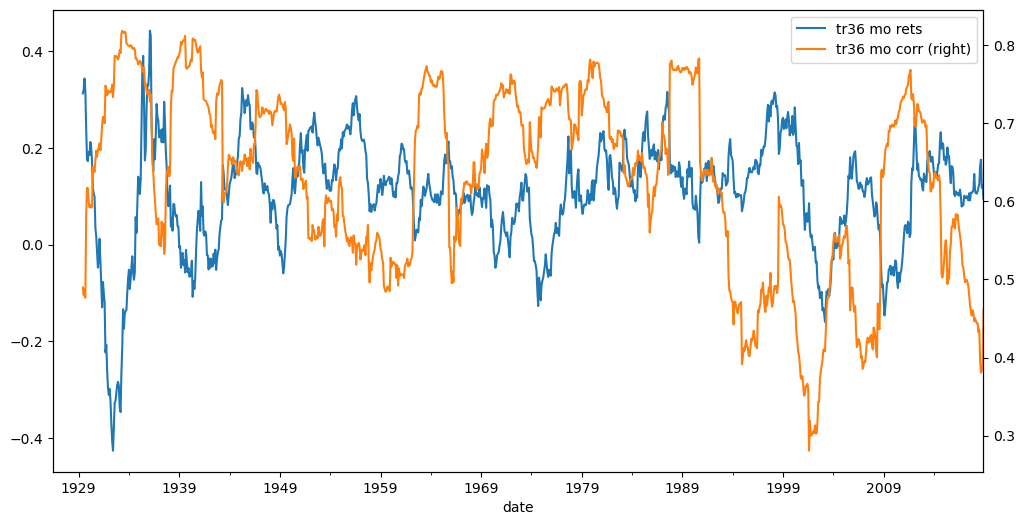

In [37]:
tmi_tr36rets.plot(label="tr36 mo rets",figsize=(12,6),legend=True)
ind_tr36corr.plot(label="tr36 mo corr",figsize=(12,6),secondary_y=True, legend=True)

When the market crashes, correlations tend to rise, but when the market is bullish, correlations decrease. This is why diversification often fails when you need it the most.

<AxesSubplot:>

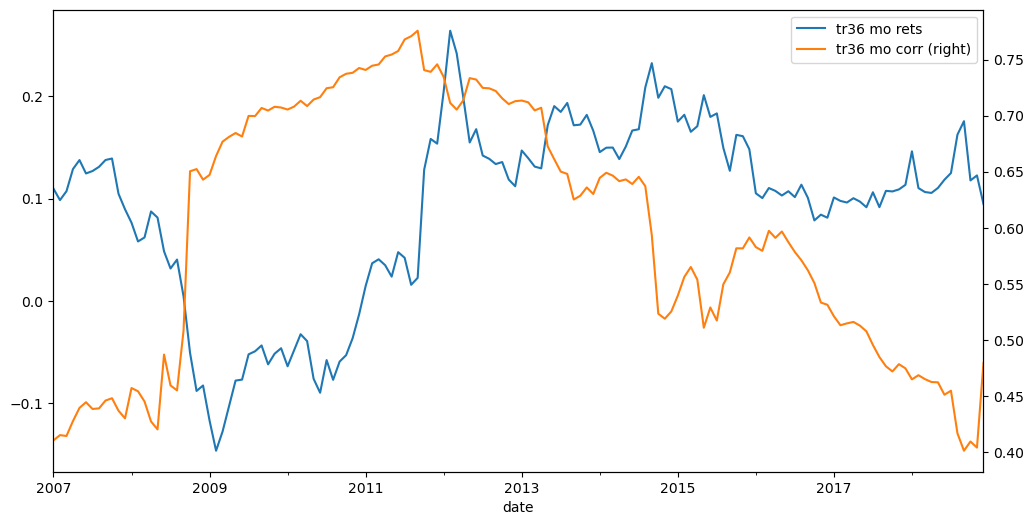

In [39]:
#2007
tmi_tr36rets["2007":].plot(label="tr36 mo rets",figsize=(12,6),legend=True)
ind_tr36corr["2007":].plot(label="tr36 mo corr",figsize=(12,6),secondary_y=True, legend=True)

As the market is plummeting in 2008-2009, correlation is spiking up. diversification is not going to help you.

In [69]:
tmi_tr36rets.corr(ind_tr36corr)

-0.2801006506288402

This is the problem of diversification.

## CCPI

It is an insurance strategy that was introduced by Black and Jones (1987). It is a procedure that allows you to generate a convex option-like payoff without using options. The strategy involves dynamic allocation between risky and safe assets, allowing you to have downside protection and upside potential simultaneously.

$$Cushion (C)= CPPI-F$$
$$Risky Asset (E)=M \times C$$
$$CPPI= E+ Riskless Asset (B)$$

You allocate to risky assets in multiples M of the difference between your asset value and a given floor. Think of the wealth level as the current value of your assets and the floor as the minimum level for your assets.

The strategy involves periodically monitoring the market to adjust the allocation between risky and non-risky assets. In practice, you may not be able or willing to trade on a daily basis due to the high transaction costs. If you trade on a quarterly basis, it could happen that the loss in the risky component is so large between two trading days that you fall below the floor before having time to trade. This is called gap risk. Gap risk materializes if the loss on the risky portfolio relative to the safe portfolio is higher than $\frac {1}{M} $within the trading interval.

Let's say $M=5$ , and $1/M=.2$, If within a quarter you lose more than 20% in your risky portfolio relative to your floor, then you will breach the floor in this case. This is why it is recommended to calibrate the multiplier as a function of your maximum potential loss within a given interval.


## Introducing Max DD constraints

We aim to protect a floor that serves as a maximum drawdown limit. The goal is to ensure that the maximum drawdown remains below a specified level, avoiding situations where losses exceed this limit.

Let's discuss a value process $V_{t}$, representing the value of the asset at time 𝑡. We have a process M_{t}, known as a running maximum process, which tracks the highest value reached by the underlying asset from day zero to time 𝑡.

We will impose a constraint that the asset value at any point in time must be greater than a certain percentage ($\alpha $) of the maximum value. This ensures that the current value remains above a fraction of the highest value reached since the start of the portfolio strategy.

If we denote $\alpha $ as the protection level (the percentage of the maximum value we are safeguarding), then by imposing the condition $V_{t}> \alpha M_{t}$, we protect against a maximum drawdown of $1-\alpha $. The maximum drawdown floor is in probability a never decreasing process.

## CPPI with performance CAP
it is a situation when investor have a CAP, like the maximum amounth of wealth that we would like to protect. We use CAP because protecting downside has an oportunity cost. Where suggesting to truncate the asset return distribution by givin up on the downside but also on giving up on the upside.
We have to define a threshold level $T_{t}$, it is something between the Floor $F_{t}$ and the Cap $C_{t}$. If your asset value is below the threshold what you should do is think in terms of CPPI. What you should do if the asset value $A_{t}$, is say between the $F_{t}$ and $T_{t}$ the allocation to risky asset should be $m(A_{t}-F_{t})$.

you'r slowing down on the way down and you're slowing down on the way up so as to have a smooth passing on the cap as opposed to crash through the cap. Just like to have a smmoth passing on the floor as opposed to crash through the floor

$$F_{t} \leq A_{t} \leq T_{r} \Rightarrow E_{t} = m (A_{t}-F_{t})$$
$$T_{t} \leq A_{t} \leq C_{r} \Rightarrow E_{t} = m (C_{t}-A_{t})$$

first you look if $A_{t}$ is closer to the cap or the floor according with that you choose the strategy.

We get the threshold through the smooth pasting condition

if you'r slightly below threshold value, you should allocate m(T_{t}-F_{t}), now if you'r slightly above the threshold value, you allocate  m(C_{t}-T_{t}). In the threshold value, those two prescription should coincide.

$$A_{t} = T_{t}  \Rightarrow E_{t} = m (T_{t}-F_{t}) = m (C_{t}-T_{t})$$

The allocation should be the same looking up and looking down when you are at the threshold value. If you solve this equation the threshold value appears to be the average of the floor and ceiling value.

$$T_{t}= \frac {F_{t}+C_{t}} {2}$$

This strategy is very convenient when you have a goal or target in mind, and they have little incentive to go beyond the target while implementing the strategy reduce the cost of downside protection